# Image classification

The project steps done in this code note book
1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process



## Setup

Import TensorFlow and other necessary libraries:

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

## Download and explore the dataset

In [2]:
img_height = 96
img_width = 96
batch_size = 8
num_classes = 2


In [3]:
# Create a Sequential model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),  # Ensure the input shape is correct
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [5]:
train_dir = 'data/train'
validation_dir = 'data/val'
test_dir = 'data/test'

# Create data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'  # Specify grayscale color mode
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'  # Specify grayscale color mode
)


Found 1864 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


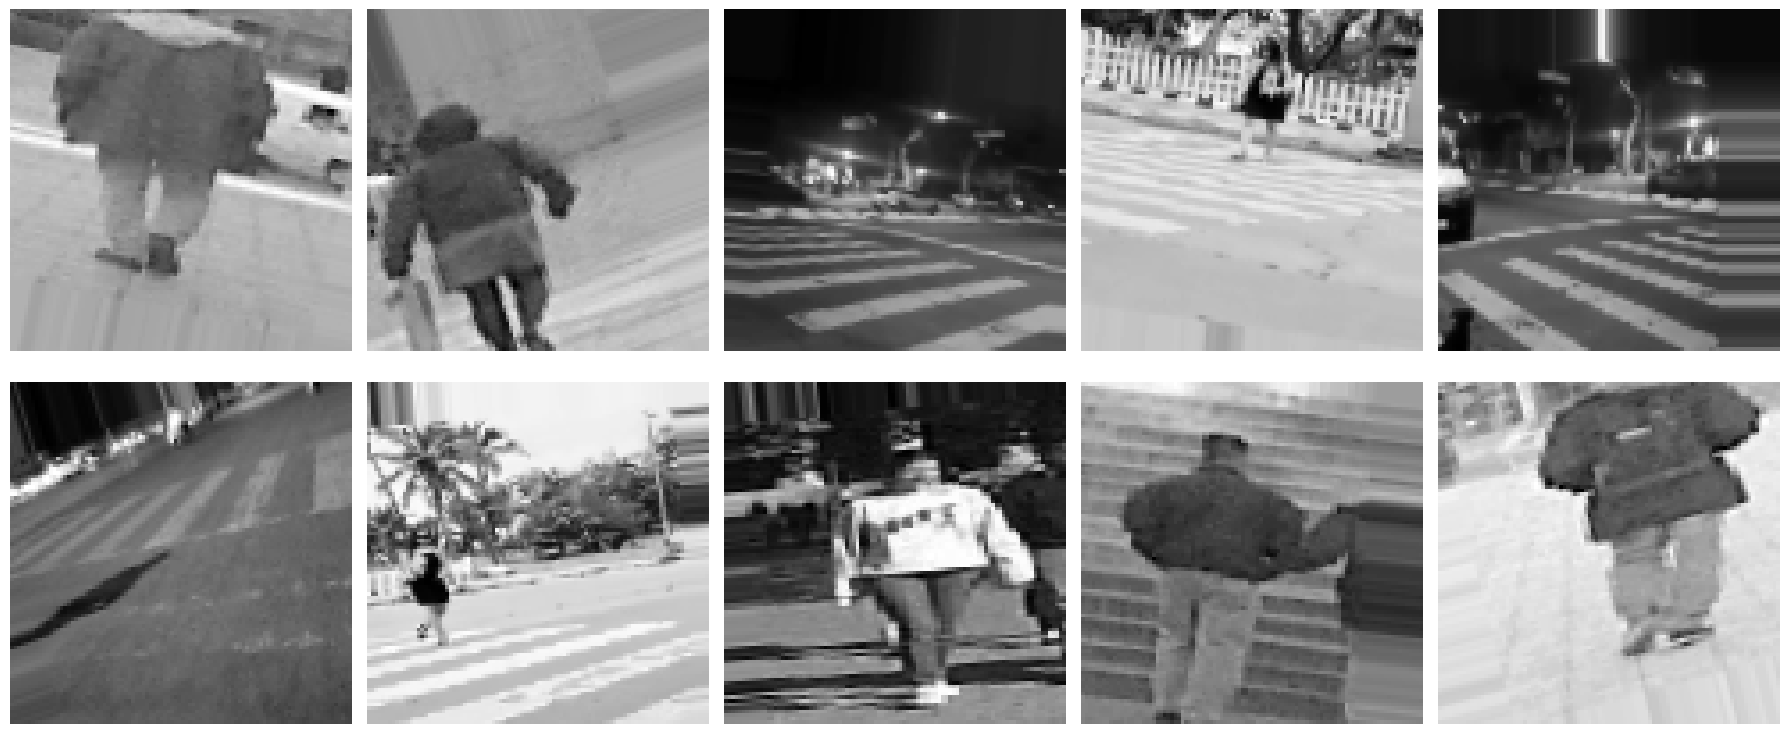

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of augmented images from the generator
augmented_images, _ = train_generator.next()

# Function to display images
def plot_images(images_array, figsize=(18, 8), rows=1):
    fig, axes = plt.subplots(rows, len(images_array)//rows, figsize=figsize)
    axes = axes.flatten()
    for img, ax in zip(images_array, axes):
        ax.imshow(img.reshape(img_height, img_width), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display original and augmented images
plot_images(np.concatenate([train_generator[0][0][:5], augmented_images[:5]]), figsize=(18, 8), rows=2)


## Visualize the data

Here are the first nine images from the training dataset:

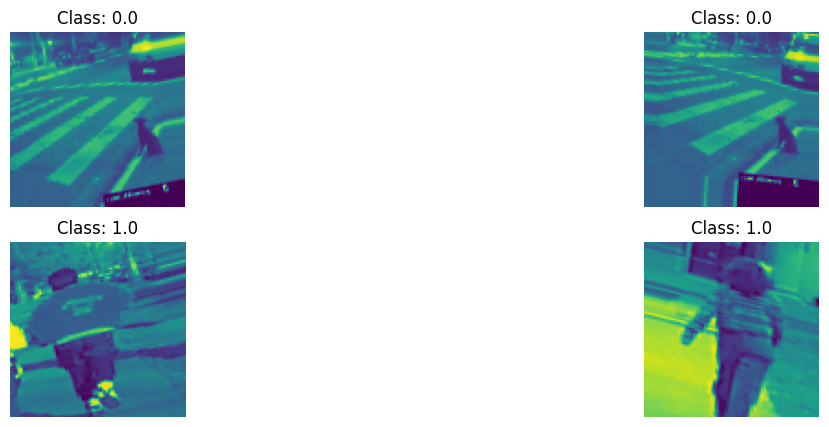

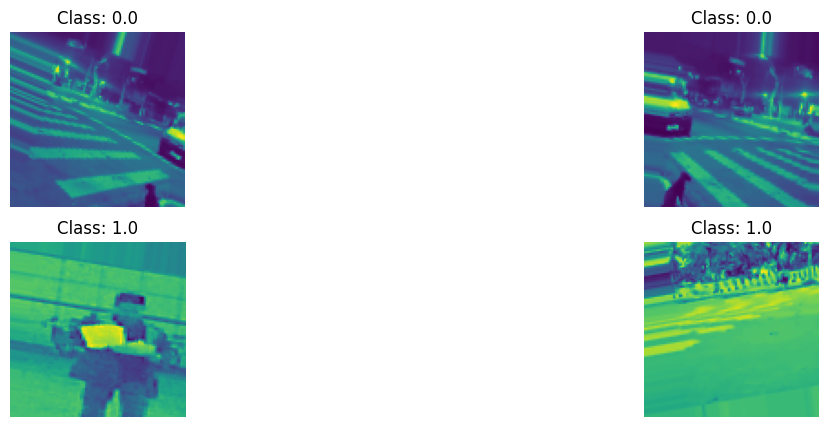

In [17]:
num_images_to_plot_per_class = num_images_to_plot // 2  # Assuming equal number of images for each class

# Create a generator to fetch a batch of images and labels from train_generator
for i, (x_batch, y_batch) in enumerate(train_generator):
    if i >= num_images_to_plot_per_class:
        break  # Stop after plotting the desired number of images for each class
    
    # Separate images based on their classes
    class_0_indices = [idx for idx, label in enumerate(y_batch) if label == 0]
    class_1_indices = [idx for idx, label in enumerate(y_batch) if label == 1]
    
    # Create a larger figure to accommodate multiple plots side by side
    plt.figure(figsize=(15, 5))
    
    # Plot images of class 0
    for j in range(num_images_to_plot_per_class):
        plt.subplot(2, num_images_to_plot_per_class, j + 1)
        plt.imshow(x_batch[class_0_indices[j]])
        plt.title(f'Class: {y_batch[class_0_indices[j]]}')
        plt.axis('off')
    
    # Plot images of class 1
    for j in range(num_images_to_plot_per_class):
        plt.subplot(2, num_images_to_plot_per_class, num_images_to_plot_per_class + j + 1)
        plt.imshow(x_batch[class_1_indices[j]])
        plt.title(f'Class: {y_batch[class_1_indices[j]]}')
        plt.axis('off')
    
    plt.show()

In [14]:

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)



Epoch 1/10
233/233 [==============================] - 59s 239ms/step - loss: 0.3096 - accuracy: 0.8686 - val_loss: 0.4947 - val_accuracy: 0.7931
Epoch 2/10
233/233 [==============================] - 22s 95ms/step - loss: 0.1812 - accuracy: 0.9340 - val_loss: 0.2829 - val_accuracy: 0.9138
Epoch 3/10
233/233 [==============================] - 22s 96ms/step - loss: 0.1573 - accuracy: 0.9426 - val_loss: 0.2491 - val_accuracy: 0.8664
Epoch 4/10
233/233 [==============================] - 22s 95ms/step - loss: 0.1226 - accuracy: 0.9523 - val_loss: 0.4412 - val_accuracy: 0.8103
Epoch 5/10
233/233 [==============================] - 23s 98ms/step - loss: 0.1108 - accuracy: 0.9592 - val_loss: 0.2318 - val_accuracy: 0.8966
Epoch 6/10
233/233 [==============================] - 22s 95ms/step - loss: 0.1052 - accuracy: 0.9646 - val_loss: 0.5291 - val_accuracy: 0.7716
Epoch 7/10
233/233 [==============================] - 22s 96ms/step - loss: 0.1067 - accuracy: 0.9635 - val_loss: 0.1982 - val_accuracy

In [15]:
 #Evaluate the model on a test dataset (optional)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'  # Specify grayscale color mode
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')
model.save('small_model.h5')


Found 25 images belonging to 2 classes.
4/4 [==============================] - 1s 329ms/step - loss: 0.0910 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


D:\Users\dlision\miniconda3\envs\tf2\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


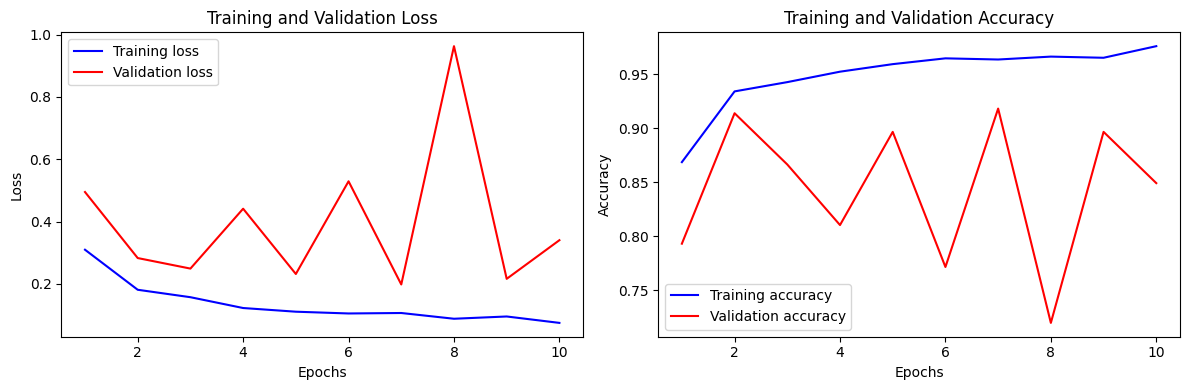

In [16]:
# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Run the TensorFlow Lite model


In [9]:

# Load your Keras model
loaded_model = tf.keras.models.load_model('small_model.h5')

# Convert to TensorFlow Lite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the quantized TFLite model
with open('small_person_detection.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\shabnam\AppData\Local\Temp\tmptnu7dszq\assets


INFO:tensorflow:Assets written to: C:\Users\shabnam\AppData\Local\Temp\tmptnu7dszq\assets


Print the signatures from the converted model to obtain the names of the inputs (and outputs):


In [10]:
!xxd -i small_person_detection.tflite > person_detection_small.cc


'xxd' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
# Function: Convert some hex value into an array for C programming
c_model_name = 'model'
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))